# Day 7:30 daily statistics - Correção de Heterocedasticidade pelo Mínimos Quadrados Ponderados

No **Day 6:30 daily statistics** de ontem eu apresentei uma base de dados que aparentemente possuia um bom comportamento dos dados, possuia um excelente valor para o coeficiente de determinação e a regressão era significativa. No entanto ao realizar uma rápida análise para os resíduos, através da visualização gráfica e pelo teste de Breusch e Pagan, observou-se que os resíduos não possuiam variância constante com o tempo, ou seja, os resíduos apresentavam problema de heterocedasticidade. Um dos primeiros métodos para a correção deste problema é a utilização do modelo $log-log$. Após o uso do modelo log-log, ainda foi possível detectar a presença de heterocedasticidade no modelo, indicando que a utilização do modelo log-log não foi eficaz para a solução do problema. No desafio de hoje utilizarei o Método dos Mínimo Quandrados Ponderados para tentar solucionar o problema da heterocedasticidade nos resíduos.

Para a correção da Heterocedasticidade pelo método dos mínimos quadrados ponderados deveremos encontrar o ***erro puro***. Mais detalhes sobre o erro puro podem ser visto no (***Day 3:30 daily statistics***).

A alternativa que será seguida é encontrar pesos que sejam inversamente proporcionais a $X_i$. Desta forma, temos:

In [1]:
 #Base de dados
y=c(19.9, 31.2, 31.8, 12.1, 40.7, 6.1, 38.6, 25.5, 10.3, 38.8, 8, 33.1, 33.5, 13.1, 14.8, 21.6, 29.3, 25, 17.9, 19.8)
x=c(22.3, 32.3, 36.6, 12.1, 42.3, 6.2, 44.7, 26.1, 10.3, 40.2, 8.1,34.5, 38, 14.1, 16.4, 24.1, 30.1, 28.3, 18.2, 20.1)
dados=data.frame(x,y)

ajuste_ponderado=lm(y~x,weights=1/x)
summary(ajuste_ponderado)


Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-0.3818 -0.1919  0.0356  0.2070  0.2711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.70936    0.43026   1.649    0.117    
x            0.90478    0.01989  45.498   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2304 on 18 degrees of freedom
Multiple R-squared:  0.9914,	Adjusted R-squared:  0.9909 
F-statistic:  2070 on 1 and 18 DF,  p-value: < 2.2e-16


Com as novas estimativas para os parâmetros do modelo, via métodos dos mínimos quadrados ponderados, obtemos o novo modelo de previsão $\hat{y}=0.70936+0.90478\cdot X + \epsilon$. Agora, deveremos realizar uma nova análise nos resíduos da nova série encontrada.

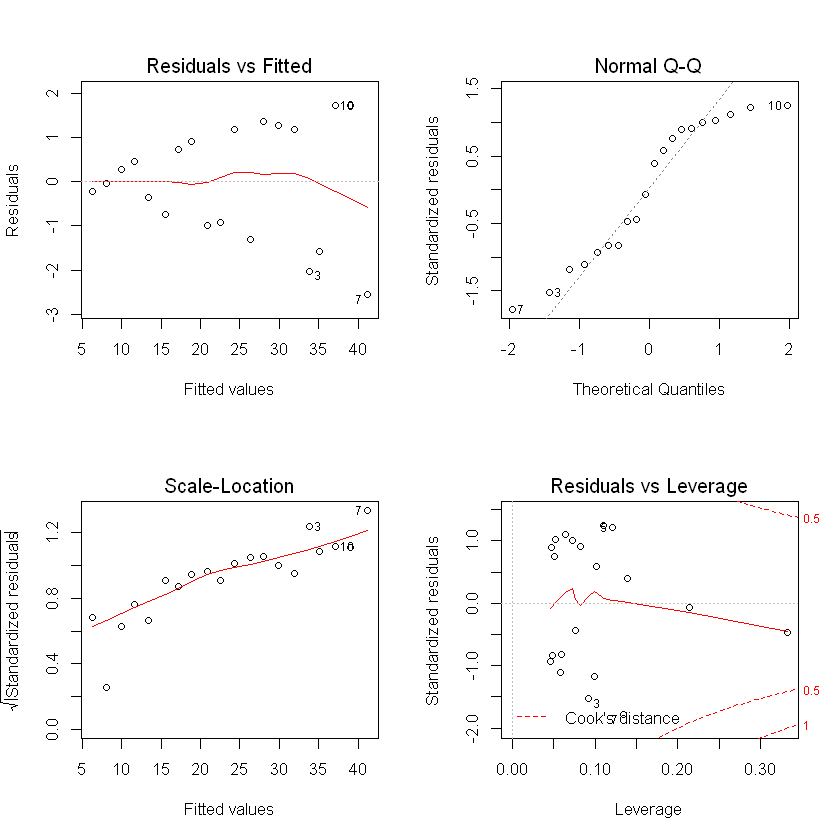

In [2]:
#Análise dos resíduos para o novo modelo estimado

par(mfrow=c(2,2))
plot(ajuste_ponderado)

O primeiro gráfico dos resíduos ainda mostram um comportamento dos resíduos em forma de funil (V), indicando graficamente que a hipótese de homocedasticidade deve ser rejeitada, indicando que ainda existe falta de constância na variância dos resíduos (presença de heterocedasticidade). Para efeito didático será apresentado o teste de Breusch e Pagan para a confirmação do resultado gráfico.

In [3]:
require(lmtest)
bptest(ajuste_ponderado)

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  ajuste_ponderado
BP = 15.842, df = 1, p-value = 6.885e-05


Da mesma forma que o recurso gráfico, o teste de BP rejeita a hipótese nula (hipótese de igualdade entre as variâncias), indicando a presença de heterocedasticidade nos resíduos. Já foram utilizados dois métodos para para a resolução do problema de heterocedasticidade nos resíduos (Modelo log-log e Método dos Mínimos Quadrados Ponderados) e ambos mostraram-se ineficazes para a correção da falta de constância na variância dos resíduos. O próximo método que deverá ser apresentado é o Método da Deflação, onde a série será deflacionada por meio de alguma medida de tamanho.